##### 6.5 Machine Learning Part 2

##### This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering

##### 1. Importing libraries and data

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # To import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import MinMaxScaler

In [77]:
# This option ensures the graphs created are displayed in notebook without the need to "call" them specifically.

%matplotlib inline

In [78]:
# Define path

path=r'C:\Users\manis\Documents\World_covid_data_Analysis'

In [79]:
#Import the cleaned dataset for the project World Covid Data Analysis
## Import data
df = pd.read_csv(os.path.join(path, '02 Data','prepared_data', 'maincoviddataset_cleanedTask6.2.csv'),index_col=False)

In [80]:
df.shape

(129585, 14)

In [81]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,continent,location,date,cumulative_cases,new_cases,cumulative_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,mortality range
0,0,0,Asia,Afghanistan,2/24/2020,5,5,0,0,0,0,0,39835428,Low mortality
1,1,1,Asia,Afghanistan,2/25/2020,5,0,0,0,0,0,0,39835428,Low mortality
2,2,2,Asia,Afghanistan,2/26/2020,5,0,0,0,0,0,0,39835428,Low mortality
3,3,3,Asia,Afghanistan,2/27/2020,5,0,0,0,0,0,0,39835428,Low mortality
4,4,4,Asia,Afghanistan,2/28/2020,5,0,0,0,0,0,0,39835428,Low mortality
5,5,5,Asia,Afghanistan,2/29/2020,5,0,0,0,0,0,0,39835428,Low mortality
6,6,6,Asia,Afghanistan,3/1/2020,5,0,0,0,0,0,0,39835428,Low mortality
7,7,7,Asia,Afghanistan,3/2/2020,5,0,0,0,0,0,0,39835428,Low mortality
8,8,8,Asia,Afghanistan,3/3/2020,5,0,0,0,0,0,0,39835428,Low mortality
9,9,9,Asia,Afghanistan,3/4/2020,5,0,0,0,0,0,0,39835428,Low mortality


In [82]:
#Drop Unecessary & categorical columns
df_new=df.drop(columns=['Unnamed: 0','Unnamed: 0.1','continent','location','date','mortality range'])

In [83]:
df_new.head(5)

,cumulative_cases,new_cases,cumulative_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population
0,5,5,0,0,0,0,0,39835428
1,5,0,0,0,0,0,0,39835428
2,5,0,0,0,0,0,0,39835428
3,5,0,0,0,0,0,0,39835428
4,5,0,0,0,0,0,0,39835428


##### 2. The elbow technique

In [84]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [85]:
score = [kmeans[i].fit(df_new).score(df_new) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3.938544529953347e+21,
 -1.1127612283575442e+21,
 -5.695762910452945e+20,
 -3.58150057790078e+20,
 -2.5443332897238585e+20,
 -1.945233751245024e+20,
 -1.4998113258148895e+20,
 -1.2881153965824224e+20,
 -1.1003438394956322e+20]

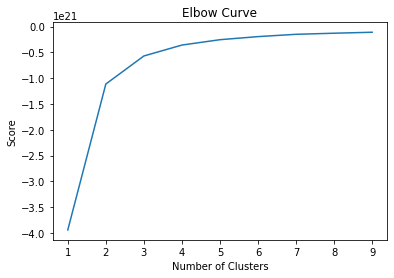

In [86]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### Optimal number of clusters for for this K-algorithm based on the elbow technique chart should be 3 , because there is a huge jump from 1 to 2, then 2 to 3 on X-axis after that the curve flattens out.

##### 3. K-means Clustering

In [87]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [88]:
# Fit the k-means object to the data.

kmeans.fit(df_new)

C:\Users\manis\OneDrive\Documents\data analytics\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [89]:
df_new['clusters'] = kmeans.fit_predict(df_new)

C:\Users\manis\OneDrive\Documents\data analytics\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [90]:
df_new.head(5)

,cumulative_cases,new_cases,cumulative_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,clusters
0,5,5,0,0,0,0,0,39835428,0
1,5,0,0,0,0,0,0,39835428,0
2,5,0,0,0,0,0,0,39835428,0
3,5,0,0,0,0,0,0,39835428,0
4,5,0,0,0,0,0,0,39835428,0


In [91]:
df_new['clusters'].value_counts()

0    128219
2      1106
1       260
Name: clusters, dtype: int64

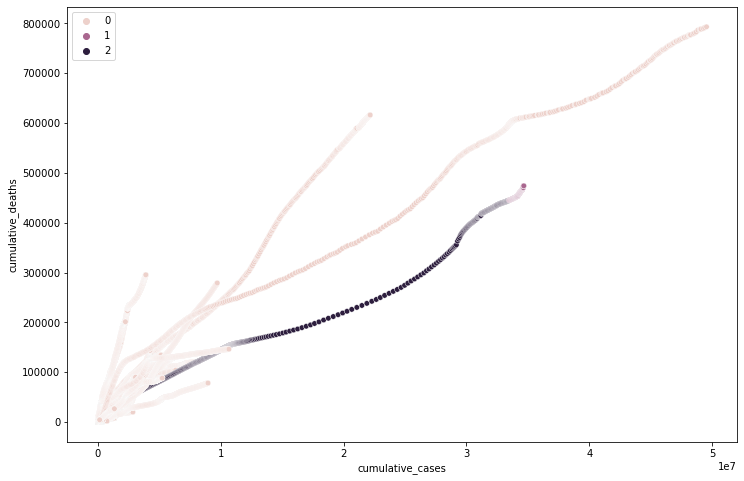

In [92]:
# Plot the clusters for the "cumulative_cases" and "cumulative_deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['cumulative_cases'], y=df_new['cumulative_deaths'], hue=kmeans.labels_, s=30) 
# Here, subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points  to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('cumulative_cases') # Label x-axis.
plt.ylabel('cumulative_deaths') # Label y-axis.
plt.show()

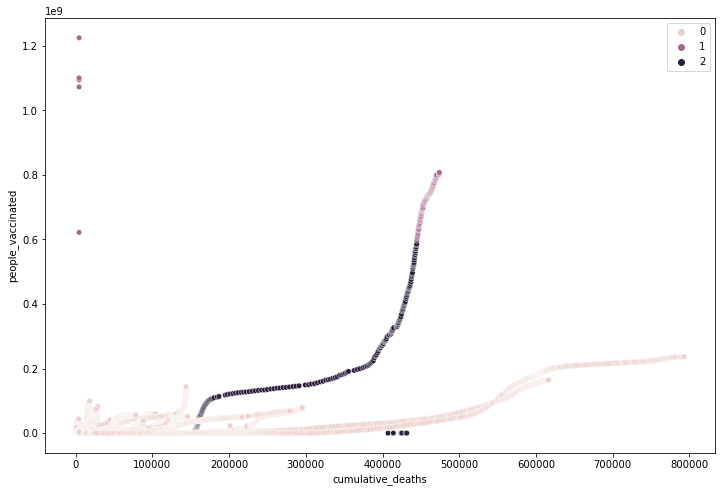

In [93]:
# Plot the clusters for the "cumulative_deaths" and "people_vaccinated" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['cumulative_deaths'], y=df_new['people_vaccinated'], hue=kmeans.labels_, s=30) 
ax.grid(False) 
plt.xlabel('cumulative_deaths') 
plt.ylabel('people_vaccinated') 
plt.show()

In [94]:
df_new.loc[df_new['clusters'] == 2, 'cluster'] = 'dark purple'
df_new.loc[df_new['clusters'] == 1, 'cluster'] = 'purple'
df_new.loc[df_new['clusters'] == 0, 'cluster'] = 'pink'

In [95]:
df_new.groupby('clusters').agg({'cumulative_cases':['mean', 'median'], 
                         'cumulative_deaths':['mean', 'median'], 
                         'people_vaccinated':['mean', 'median']})

cumulative_cases          cumulative_deaths        people_vaccinated  \
                     mean   median              mean median              mean   
clusters                                                                        
0            4.587371e+05  16801.0      10818.016019    281      2.218015e+06   
1            1.071992e+07  96723.0     145852.653846   4636      2.435923e+08   
2            6.122958e+06  90479.5      83745.085895   4636      4.113750e+07   

                 
         median  
clusters         
0             0  
1             0  
2             0

In [96]:
# Scaling the X(Cumulative_deaths) and y(people_vaccinated) axis , to bring them on the same scale and see if that makes any difference in Clustering

scaler = MinMaxScaler()

scaler.fit(df_new[['cumulative_deaths']])
df_new['cumulative_deaths'] = scaler.transform(df_new[['cumulative_deaths']])

scaler.fit(df_new[['people_vaccinated']])
df_new['people_vaccinated'] = scaler.transform(df_new[['people_vaccinated']])

In [97]:
df_new.head(10)

,cumulative_cases,new_cases,cumulative_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,clusters,cluster
0,5,5,0.0,0,0,0.0,0,39835428,0,pink
1,5,0,0.0,0,0,0.0,0,39835428,0,pink
2,5,0,0.0,0,0,0.0,0,39835428,0,pink
3,5,0,0.0,0,0,0.0,0,39835428,0,pink
4,5,0,0.0,0,0,0.0,0,39835428,0,pink
5,5,0,0.0,0,0,0.0,0,39835428,0,pink
6,5,0,0.0,0,0,0.0,0,39835428,0,pink
7,5,0,0.0,0,0,0.0,0,39835428,0,pink
8,5,0,0.0,0,0,0.0,0,39835428,0,pink
9,5,0,0.0,0,0,0.0,0,39835428,0,pink


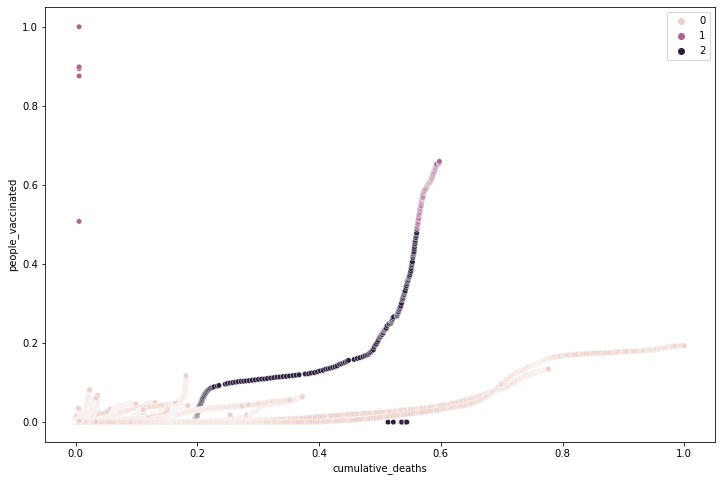

In [98]:
# Plot the clusters for the "cumulative_deaths" and "people_vaccinated" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['cumulative_deaths'], y=df_new['people_vaccinated'], hue=kmeans.labels_, s=30) 
ax.grid(False) 
plt.xlabel('cumulative_deaths') 
plt.ylabel('people_vaccinated') 
plt.show()

##### Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.


Here we see the three different clusters which makes sense and I can interpret these cluster as follows :

In the light pink cluster, we have countries where the mortality is very high and comparitively they are way beyond in vaccination rates. There is also a possibility for this cluster that because vaccination started very late after the all research and approval of vaccination from competent authorities countrywise, and the by that time deaths already happened and now those countries with higher death rates going to take lot of time to catch up on their vaccination rates.

In the dark purple cluster, we have countries with high death rates but their vaccination is also picking up faster.

In the purple cluster , we have countries where we can see the slow down of mortality because of high vaccination rates

##### Propose what these results could be useful for in future steps of an analytics pipeline.

Based on this Clustering model, I can do further analysis and find out why some countries are doing better in vaccination rates and why not others.

Also based on the cluster formation , I can test my hypothesis on certain locations and find out which clusters are best fits for my stated hypothesis or not any, then I can do further analysis of data
